In [2]:
from keras.preprocessing.image import img_to_array#图片转为array
from keras.utils import to_categorical#相当于one-hot
from imutils import paths
import cv2
import numpy as np
import random
import os

path = './train/NORMAL/'
filelist = os.listdir(path) #该文件夹下所有的文件（包括文件夹）
count=0
for file in range(len(filelist)):
    print(file)
for file in filelist:   #遍历所有文件
    Olddir=os.path.join(path,file)   #原来的文件路径
    if os.path.isdir(Olddir):   #如果是文件夹则跳过
        continue
    filename=os.path.splitext(file)[0]   #文件名
    filetype=os.path.splitext(file)[1]   #文件扩展名
    Newdir=os.path.join(path,'normal.'+str(count)+filetype)  #用字符串函数zfill 以0补全所需位数
    os.rename(Olddir,Newdir)#重命名
    count+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
path = './train/PNEUMONIA/'
filelist = os.listdir(path) #该文件夹下所有的文件（包括文件夹）
count=0
for file in range(len(filelist)):
    print(file)
for file in filelist:   #遍历所有文件
    Olddir=os.path.join(path,file)   #原来的文件路径
    if os.path.isdir(Olddir):   #如果是文件夹则跳过
        continue
    filename=os.path.splitext(file)[0]   #文件名
    filetype=os.path.splitext(file)[1]   #文件扩展名
    Newdir=os.path.join(path,'pneumonia.'+str(count)+filetype)  #用字符串函数zfill 以0补全所需位数
    os.rename(Olddir,Newdir)#重命名
    count+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490


In [5]:
path = './test/NORMAL/'
filelist = os.listdir(path) #该文件夹下所有的文件（包括文件夹）
count=1341
#for file in range(len(filelist)):
    #print(file)
for file in filelist:   #遍历所有文件
    Olddir=os.path.join(path,file)   #原来的文件路径
    if os.path.isdir(Olddir):   #如果是文件夹则跳过
        continue
    filename=os.path.splitext(file)[0]   #文件名
    filetype=os.path.splitext(file)[1]   #文件扩展名
    Newdir=os.path.join(path,'normal.'+str(count)+filetype)  #用字符串函数zfill 以0补全所需位数
    os.rename(Olddir,Newdir)#重命名
    count+=1

In [6]:
path = './test/PNEUMONIA/'
filelist = os.listdir(path) #该文件夹下所有的文件（包括文件夹）
count=3875
#for file in range(len(filelist)):
    #print(file)
for file in filelist:   #遍历所有文件
    Olddir=os.path.join(path,file)   #原来的文件路径
    if os.path.isdir(Olddir):   #如果是文件夹则跳过
        continue
    filename=os.path.splitext(file)[0]   #文件名
    filetype=os.path.splitext(file)[1]   #文件扩展名
    Newdir=os.path.join(path,'pneumonia.'+str(count)+filetype)  #用字符串函数zfill 以0补全所需位数
    os.rename(Olddir,Newdir)#重命名
    count+=1

In [2]:
import os,sys
import numpy as np
import scipy
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import random

@tf.function
def DataSet():
    
    normal_train = './train/NORMAL/'
    pneumonia_train = './train/PNEUMONIA/'
    
    normal_test = './test/NORMAL/'
    pneumonia_test = './test/PNEUMONIA/'
    
    img_normal_train = os.listdir(normal_train)
    img_pneumonia_train = os.listdir(pneumonia_train)
    
    img_normal_test = os.listdir(normal_test)
    img_pneumonia_test = os.listdir(pneumonia_test)
        
    X_train = np.empty((len(img_normal_train) + len(img_pneumonia_train), 100, 100, 3))
    Y_train = np.empty((len(img_normal_train) + len(img_pneumonia_train), ))
    count = 0
    for img_name in img_normal_train:
        
        img_path = normal_train + img_name
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img) / 255.0
        
        X_train[count] = img
        Y_train[count] = np.array(0)
        count+=1
        
    for img_name in img_pneumonia_train:

        img_path = pneumonia_train + img_name
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img) / 255.0
        
        X_train[count] = img
        Y_train[count] = np.array(1)
        count+=1
        
    X_test = np.empty((len(img_normal_test) + len(img_pneumonia_test), 100, 100, 3))
    Y_test = np.empty((len(img_normal_test) + len(img_pneumonia_test), ))
    count = 0
    for img_name in img_normal_test:

        img_path = normal_test + img_name
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array(0)
        count+=1
        
    for img_name in img_pneumonia_test:
        
        img_path = pneumonia_test + img_name
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array(1)
        count+=1
        
    index = [i for i in range(len(X_train))]
    random.shuffle(index)
    X_train = X_train[index]
    Y_train = Y_train[index]
    
    index = [i for i in range(len(X_test))]
    random.shuffle(index)
    X_test = X_test[index]    
    Y_test = Y_test[index]

    return X_train,Y_train,X_test,Y_test


X_train,Y_train,X_test,Y_test = DataSet()
print('X_train shape : ',X_train.shape)
print('Y_train shape : ',Y_train.shape)
print('X_test shape : ',X_test.shape)
print('Y_test shape : ',Y_test.shape)

X_train shape :  (5216, 100, 100, 3)
Y_train shape :  (5216,)
X_test shape :  (624, 100, 100, 3)
Y_test shape :  (624,)


In [4]:
#建立模型
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Model
from keras import layers
from tensorflow.keras.applications import xception
from keras.layers import Dense, Input, BatchNormalization, Activation, Dropout, Flatten
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.utils.data_utils import get_file

#WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels.h5'

img_input = Input(shape=(100,100,3))

# Block 1
x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)(img_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
    
# Block 2
x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 2 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

residual = Conv2D(256, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 3
x = Activation('relu')(x)
x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 3 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

residual = Conv2D(728, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# Block 5 - 12
for i in range(8):
    residual = x

    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)

    x = layers.add([x, residual])
    
residual = Conv2D(1024, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 13
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 13 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# Block 14
x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Block 14 part 2
x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Fully Connected Layer
x = GlobalAveragePooling2D()(x)
x = Dense(2, activation='softmax')(x)

inputs = img_input

# Create model
model = Model(inputs, x, name='xception')

# Download and cache the Xception weights file
#weights_path = get_file('xception_weights.h5', WEIGHTS_PATH, cache_subdir='models')
#model.load_weights(weights_path)

#定義優化器
#sgd=SGD(lr=0.001,decay=1e-6,momentum=0.9,nesterov=True)
#rms=RMSprop(lr=0.001,decay=1e-6,momentum=0.0)
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_40 (BatchNo (None, 49, 49, 32)   128         conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 49, 49, 32)   0           batch_normalization_40[0][0]     
___________________________________________________________________________________________

In [5]:
base_dir = r'C:\Users\user\Desktop\chest-xray-classification'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)  # 請注意！驗證資料不應該擴充!!!

train_generator = train_datagen.flow_from_directory(
    train_dir,    # 目標目錄
    target_size=(100, 100), # 所有圖像大小調整成 100x100
    batch_size=16,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (100,100),
    batch_size=16, 
    class_mode="binary")

# 訓練
#history = model.fit(X_train, Y_train, batch_size=20, epochs=50, validation_data=(X_test,Y_test))
history = model.fit_generator(train_generator, steps_per_epoch=300, epochs=50, validation_data=(X_test,Y_test))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
300/300 [==============================] - 316s 1s/step - accuracy: 0.8913 - loss: 0.2726 - val_accuracy: 0.6250 - val_loss: 0.6590
Epoch 2/50
300/300 [==============================] - 318s 1s/step - accuracy: 0.9256 - loss: 0.1972 - val_accuracy: 0.6378 - val_loss: 2.0347
Epoch 3/50
300/300 [==============================] - 307s 1s/step - accuracy: 0.9410 - loss: 0.1615 - val_accuracy: 0.7324 - val_loss: 1.0777
Epoch 4/50
300/300 [==============================] - 292s 975ms/step - accuracy: 0.9394 - loss: 0.1613 - val_accuracy: 0.8173 - val_loss: 0.3711
Epoch 5/50
300/300 [==============================] - 287s 958ms/step - accuracy: 0.9458 - loss: 0.1465 - val_accuracy: 0.8702 - val_loss: 0.4069
Epoch 6/50
300/300 [==============================] - 286s 955ms/step - accuracy

In [7]:
model.save('cnn_xception_adam.h5')

In [8]:
score=model.evaluate(X_test,Y_test)
print(score)

20/20 [==============================] - 5s 245ms/step - accuracy: 0.9231 - loss: 0.2381
[0.2381407916545868, 0.9230769276618958]


In [9]:
#predictions = model.predict_classes(X_test)
predictions = model.predict(X_test)

In [10]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 12)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), int((prediction[idx])[1]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()

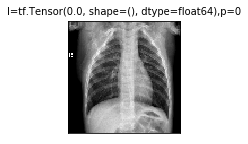

In [12]:
plot_images_labels_predict(X_train, Y_train, predictions, 0, 1)

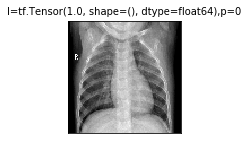

In [13]:
plot_images_labels_predict(X_train, Y_train, predictions, 1, 1)

In [14]:
import pandas as pd 
test_label_onearr = np.reshape(Y_test, [-1]).astype('int')
#predictions_onearr = np.reshape(predictions, [-1]).astype('int')
#print(len(predictions_onearr))
#print(len(test_label_onearr))
checkList = pd.DataFrame( {'label': test_label_onearr       # Column1 名稱: 欄位值集合 (這裡提供 Label 真實數值)
                          ,'prediction': np.argmax(predictions, axis=1)  # Column2 名稱: 欄位值集合 (這裡提供 AI 預測結果)
                          }
                        )

# 顯示對照表前 20 筆結果
print( checkList[0:20] )

    label  prediction
0       1           1
1       0           0
2       1           1
3       0           0
4       1           1
5       1           1
6       0           0
7       1           1
8       1           1
9       0           1
10      0           0
11      1           1
12      1           1
13      1           1
14      1           1
15      0           0
16      0           0
17      0           0
18      0           0
19      1           0


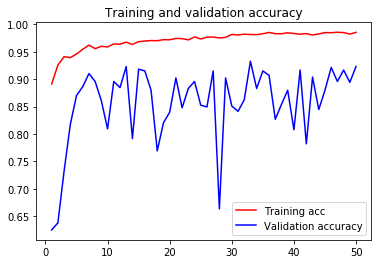

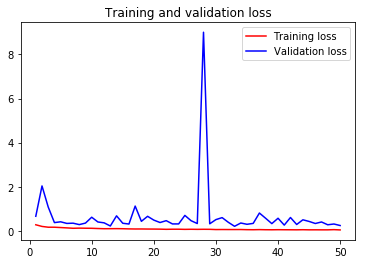

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
#plt.savefig('Model accuracy.png')

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#plt.savefig('Model loss.png')

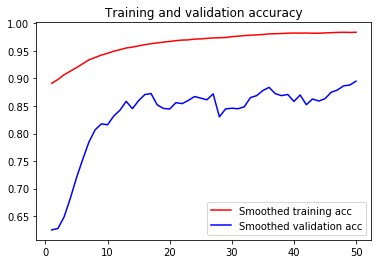

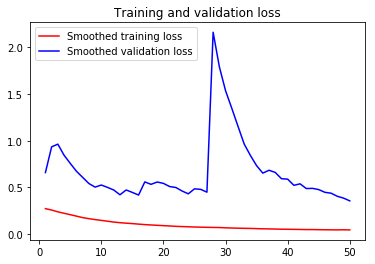

In [16]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot( epochs,
       smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot( epochs,
       smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot( epochs,
       smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot( epochs,
       smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
predict_label=np.argmax(predictions,axis=1)
import pandas as pd
pd.crosstab(test_label_onearr,predict_label,rownames=['label'],colnames=['predict'])

predict,0,1
label,,
0,206,28
1,20,370


In [ ]:
#-----------Ophthalmoscope-----------

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet101, ResNet152, ResNet50V2, InceptionResNetV2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from classification_models.keras import Classifiers

In [ ]:
import os,sys
import numpy as np
import scipy
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import random

@tf.function
def DataSet():
    
    normal_train = './Fundus_Scanes_Sorted/Train/Glaucoma_Positive/'
    pneumonia_train = './Fundus_Scanes_Sorted/Train/Glaucoma_Negative/'
    
    normal_test = './Fundus_Scanes_Sorted/Validation/Glaucoma_Positive/'
    pneumonia_test = './Fundus_Scanes_Sorted/Validation/Glaucoma_Negative/'
    
    img_normal_train = os.listdir(normal_train)
    img_pneumonia_train = os.listdir(pneumonia_train)
    
    img_normal_test = os.listdir(normal_test)
    img_pneumonia_test = os.listdir(pneumonia_test)
        
    X_train = np.empty((len(img_normal_train) + len(img_pneumonia_train), 100, 100, 3))
    Y_train = np.empty((len(img_normal_train) + len(img_pneumonia_train), ))
    count = 0
    for img_name in img_normal_train:
        
        img_path = normal_train + img_name
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img) / 255.0
        
        X_train[count] = img
        Y_train[count] = np.array(0)
        count+=1
        
    for img_name in img_pneumonia_train:

        img_path = pneumonia_train + img_name
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img) / 255.0
        
        X_train[count] = img
        Y_train[count] = np.array(1)
        count+=1
        
    X_test = np.empty((len(img_normal_test) + len(img_pneumonia_test), 100, 100, 3))
    Y_test = np.empty((len(img_normal_test) + len(img_pneumonia_test), ))
    count = 0
    for img_name in img_normal_test:

        img_path = normal_test + img_name
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array(0)
        count+=1
        
    for img_name in img_pneumonia_test:
        
        img_path = pneumonia_test + img_name
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array(1)
        count+=1
        
    index = [i for i in range(len(X_train))]
    random.shuffle(index)
    X_train = X_train[index]
    Y_train = Y_train[index]
    
    index = [i for i in range(len(X_test))]
    random.shuffle(index)
    X_test = X_test[index]    
    Y_test = Y_test[index]

    return X_train,Y_train,X_test,Y_test


X_train,Y_train,X_test,Y_test = DataSet()
print('X_train shape : ',X_train.shape)
print('Y_train shape : ',Y_train.shape)
print('X_test shape : ',X_test.shape)
print('Y_test shape : ',Y_test.shape)

In [ ]:
#建立模型
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Model
from keras import layers
from tensorflow.keras.applications import xception
from keras.layers import Dense, Input, BatchNormalization, Activation, Dropout, Flatten
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.utils.data_utils import get_file

#WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels.h5'

img_input = Input(shape=(100,100,3))

# Block 1
x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)(img_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
    
# Block 2
x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 2 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

residual = Conv2D(256, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 3
x = Activation('relu')(x)
x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 3 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

residual = Conv2D(728, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# Block 5 - 12
for i in range(8):
    residual = x

    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)

    x = layers.add([x, residual])
    
residual = Conv2D(1024, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 13
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 13 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# Block 14
x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Block 14 part 2
x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Fully Connected Layer
x = GlobalAveragePooling2D()(x)
x = Dense(2, activation='softmax')(x)

inputs = img_input

# Create model
model = Model(inputs, x, name='xception')

# Download and cache the Xception weights file
#weights_path = get_file('xception_weights.h5', WEIGHTS_PATH, cache_subdir='models')
#model.load_weights(weights_path)

#定義優化器
#sgd=SGD(lr=0.001,decay=1e-6,momentum=0.9,nesterov=True)
#rms=RMSprop(lr=0.001,decay=1e-6,momentum=0.0)
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

In [ ]:
base_dir = r'C:\Users\user\Desktop\chest-xray-classification\Fundus_Scanes_Sorted'
train_dir = os.path.join(base_dir, 'Train')
#test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'Validation')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# 請注意！驗證資料不應該擴充!!!
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,    # 目標目錄
    target_size=(100, 100), # 所有圖像大小調整成 100x100
    batch_size=16,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='binary')

# 訓練
history = model.fit(X_train, Y_train, batch_size=16, epochs=50, validation_data=(X_test,Y_test))
#history = model.fit_generator(train_generator, steps_per_epoch=300, epochs=50, validation_data=(X_test,Y_test))